In [1]:
%autosave 0

Autosave disabled


## Contents
1. **Data overwiew.** <br>
2. **Data arrangments.** <br> 
3. **Analytics.** <br> _Basic geoanalytics._<br>_Turnover analytics(aggregated turnover, turnover in categories, categories growing/declining)_<br>_Products analytics (best/worst selling products by category, dependence of product weight on turnover and price)_<br>_Sellers analytics (best/worst sellers (aggregated), best/worst seller(s) by state)_

# 1) Data overwiew
Overwiew of the raw data, some minor preprocessing. 

In [2]:
import pandas as pd
import numpy as np

In [3]:
sellers = pd.read_csv('sellers.csv')
products = pd.read_csv('products.csv')
orders = pd.read_csv('orders.csv')
order_items = pd.read_csv('order_items.csv')

## 1.1) Sellers

In [4]:
sellers.head(3)

,seller_id,seller_zip_code_prefix,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,13023,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,13844,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,20031,rio de janeiro,RJ


In [5]:
sellers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtypes: int64(1), object(3)
memory usage: 96.8+ KB


In [6]:
sellers.set_index('seller_id', inplace=True)
sellers = sellers[['seller_state']]
sellers['turnover'] = 0
sellers['items_sold'] = 0

In [7]:
sellers.head(3)

,seller_state,turnover,items_sold
seller_id,,,
3442f8959a84dea7ee197c632cb2df15,SP,0,0
d1b65fc7debc3361ea86b5f14c68d2e2,SP,0,0
ce3ad9de960102d0677a81f5d0bb7b2d,RJ,0,0


## 1.2) Products

In [8]:
products.head(3)

,product_id,product_category_name,product_name_lenght,product_description_lenght,product_photos_qty,product_weight_g,product_length_cm,product_height_cm,product_width_cm
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,40.0,287.0,1.0,225.0,16.0,10.0,14.0
1,3aa071139cb16b67ca9e5dea641aaa2f,artes,44.0,276.0,1.0,1000.0,30.0,18.0,20.0
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer,46.0,250.0,1.0,154.0,18.0,9.0,15.0


In [9]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32951 entries, 0 to 32950
Data columns (total 9 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   product_id                  32951 non-null  object 
 1   product_category_name       32341 non-null  object 
 2   product_name_lenght         32341 non-null  float64
 3   product_description_lenght  32341 non-null  float64
 4   product_photos_qty          32341 non-null  float64
 5   product_weight_g            32949 non-null  float64
 6   product_length_cm           32949 non-null  float64
 7   product_height_cm           32949 non-null  float64
 8   product_width_cm            32949 non-null  float64
dtypes: float64(7), object(2)
memory usage: 2.3+ MB


NOTE: Products price changes over time as shown below.

In [10]:
unique_prices_per_product = order_items.groupby('product_id')['price'].nunique()
rows_with_multiple_prices = order_items[order_items['product_id'].isin(unique_prices_per_product[unique_prices_per_product != 1].index)]
rows_with_multiple_prices.set_index('product_id', inplace=True)
rows_with_multiple_prices.loc[rows_with_multiple_prices.head(1).index].head()

,order_id,order_item_id,seller_id,shipping_limit_date,price,freight_value
product_id,,,,,,
4244733e06e7ecb4970a6e2683c13e61,00010242fe8c5a6d1ba2dd792cb16214,1,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
4244733e06e7ecb4970a6e2683c13e61,130898c0987d1801452a8ed92a670612,1,48436dade18ac8b2bce089ec2a041202,2017-07-05 02:44:11,55.9,17.96
4244733e06e7ecb4970a6e2683c13e61,532ed5e14e24ae1f0d735b91524b98b9,1,48436dade18ac8b2bce089ec2a041202,2018-05-23 10:56:25,64.9,18.33
4244733e06e7ecb4970a6e2683c13e61,6f8c31653edb8c83e1a739408b5ff750,1,48436dade18ac8b2bce089ec2a041202,2017-08-07 18:55:08,58.9,16.17
4244733e06e7ecb4970a6e2683c13e61,7d19f4ef4d04461989632411b7e588b9,1,48436dade18ac8b2bce089ec2a041202,2017-08-16 22:05:11,58.9,13.29


In [11]:
products.set_index('product_id', inplace=True)
products = products[['product_category_name','product_weight_g']]
products['turnover'] = 0
products['items_sold'] = 0
products['recent_price'] = 0
# missing categories are treated as a category of its own
products.product_category_name = products.product_category_name.fillna('NaN')

In [12]:
products.head(3)

,product_category_name,product_weight_g,turnover,items_sold,recent_price
product_id,,,,,
1e9e8ef04dbcff4541ed26657ea517e5,perfumaria,225.0,0,0,0
3aa071139cb16b67ca9e5dea641aaa2f,artes,1000.0,0,0,0
96bd76ec8810374ed1b65e291975717f,esporte_lazer,154.0,0,0,0


In [13]:
products.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32951 entries, 1e9e8ef04dbcff4541ed26657ea517e5 to 106392145fca363410d287a815be6de4
Data columns (total 5 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   product_category_name  32951 non-null  object 
 1   product_weight_g       32949 non-null  float64
 2   turnover               32951 non-null  int64  
 3   items_sold             32951 non-null  int64  
 4   recent_price           32951 non-null  int64  
dtypes: float64(1), int64(3), object(1)
memory usage: 1.5+ MB


We have 2 instances of np.NaN in 'product_weight_g', but it is best to leave it for now as it is (we want to avoid possible indexing error downstream).

In [14]:
order_items.drop_duplicates(subset=['product_id']).shape

(32951, 7)

## 1.3) Orders
This is the dataframe we will need to cycle through in order to retrieve information needed.

In [15]:
orders.head(3)

,order_id,customer_id,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,2018-07-26 03:24:27,2018-07-26 14:31:00,2018-08-07 15:27:45,2018-08-13 00:00:00
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,2018-08-08 08:55:23,2018-08-08 13:50:00,2018-08-17 18:06:29,2018-09-04 00:00:00


In [16]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   order_id                       99441 non-null  object
 1   customer_id                    99441 non-null  object
 2   order_status                   99441 non-null  object
 3   order_purchase_timestamp       99441 non-null  object
 4   order_approved_at              99281 non-null  object
 5   order_delivered_carrier_date   97658 non-null  object
 6   order_delivered_customer_date  96476 non-null  object
 7   order_estimated_delivery_date  99441 non-null  object
dtypes: object(8)
memory usage: 6.1+ MB


In [17]:
# we will adopt order_purchase_timestamp as a timestamp
orders.order_purchase_timestamp = pd.to_datetime(orders['order_purchase_timestamp'])
orders.set_index('order_purchase_timestamp', inplace=True)
orders.sort_index(inplace=True)
# we will be intrested only in delivered orders in our considerations
orders = orders[orders.order_status == "delivered"]

## 1.4) Order items

In [18]:
order_items.head(3)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.9,13.29
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.9,19.93
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.0,17.87


In [19]:
order_items.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112650 entries, 0 to 112649
Data columns (total 7 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   order_id             112650 non-null  object 
 1   order_item_id        112650 non-null  int64  
 2   product_id           112650 non-null  object 
 3   seller_id            112650 non-null  object 
 4   shipping_limit_date  112650 non-null  object 
 5   price                112650 non-null  float64
 6   freight_value        112650 non-null  float64
dtypes: float64(2), int64(1), object(4)
memory usage: 6.0+ MB


# 2) Data arrangements
Here we cycle through orders dataframe in order to fill created containers that will be helpful in secion 3. Prior to that, product_turnover dataframe is created for further analysis of aggreagate turnover as well as dictionary of dataframes created in order to analyze turnover by category.

In [20]:
# this timespan has been directly derived from orders.order_purchase_timestamp (orders.index)
start_date = '2016-09-15'
end_date = '2018-08-29'
datetime_index = pd.date_range(start=start_date, end=end_date, freq='D')
column_names = ['items_sold', 'turnover']

In [21]:
# aggregate turnover dataframe (all categories)
product_turnover = pd.DataFrame(0, index=datetime_index, columns=column_names)

In [22]:
product_turnover.head(3)

,items_sold,turnover
2016-09-15,0,0
2016-09-16,0,0
2016-09-17,0,0


In [23]:
# turnoover dataframes for category analitycs
categories = {}
for category in products.product_category_name.unique():
    categories[category] = pd.DataFrame(0, index=datetime_index, columns=column_names)

In [24]:
%%time
for index, row in orders.iterrows():
    # dataframe fo aggregate turnover analitycs
    product_turnover.items_sold[index.strftime('%Y-%m-%d')] += order_items[order_items.order_id == row.order_id].shape[0]
    product_turnover.turnover[index.strftime('%Y-%m-%d')] += order_items[order_items.order_id == row.order_id].price.sum()
    for item in order_items[order_items.order_id == row.order_id].iterrows():
        # dataframes for category turnover analitycs
        group = products.loc[item[1].product_id].product_category_name
        categories[group].items_sold[index.strftime('%Y-%m-%d')] += 1
        categories[group].turnover[index.strftime('%Y-%m-%d')] += item[1].price
        # sellers dataframe update
        sellers.loc[item[1].seller_id, 'items_sold'] += 1
        sellers.loc[item[1].seller_id, 'turnover'] += item[1].price
        # products dataframe update
        products.loc[item[1].product_id, 'items_sold'] += 1  
        products.loc[item[1].product_id, 'turnover'] += item[1].price
        products.loc[item[1].product_id, 'recent_price'] = item[1].price        

<timed exec>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/home/petewojtczak/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1637: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)
<timed exec>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
<timed exec>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the docume

CPU times: user 36min 41s, sys: 254 ms, total: 36min 41s
Wall time: 36min 42s


# 3) Analytics
Basic geoanalytics.<br>
Turnover analytics(aggregated turnover, turnover in categories, categories growing/declining).<br>
Products analytics (best/worst selling products by category, dependence of product weight on turnover and price).<br>
Sellers analytics (best/worst seller(s) by state, best/worst sellers (aggregated)).<br>

## 3.1)  Basic geoanalytics

In [25]:
sellers.head(3)

,seller_state,turnover,items_sold
seller_id,,,
3442f8959a84dea7ee197c632cb2df15,SP,218.70,3
d1b65fc7debc3361ea86b5f14c68d2e2,SP,11413.17,40
ce3ad9de960102d0677a81f5d0bb7b2d,RJ,158.00,1


In [26]:
state_turnover = sellers.groupby('seller_state')['turnover'].sum()
total_turnover = state_turnover.sum()
state_share = state_turnover / total_turnover

In [27]:
state_share.sort_values(ascending=False).head(8)

seller_state
SP    0.643612
PR    0.093189
MG    0.073960
RJ    0.062066
SC    0.046409
RS    0.028243
BA    0.021021
DF    0.007173
Name: turnover, dtype: float64

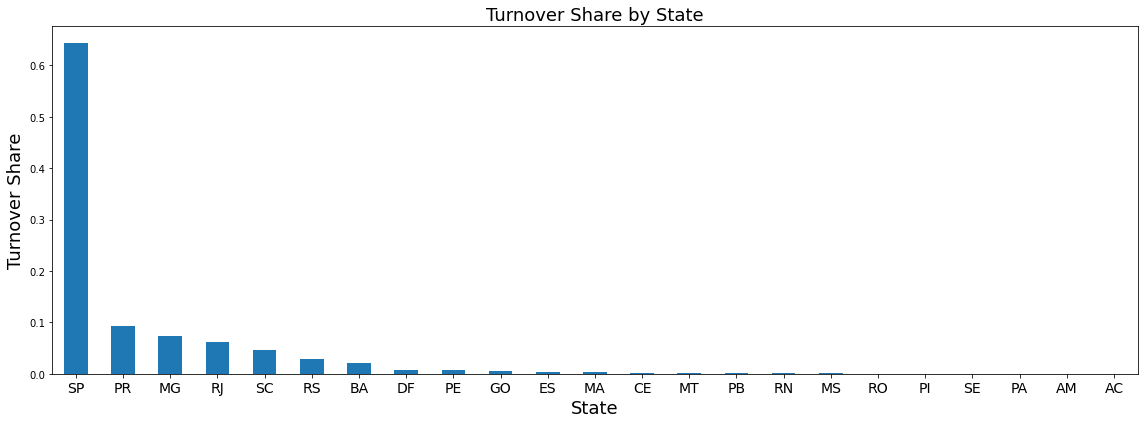

In [28]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16, 6))
state_share.sort_values(ascending=False).plot(kind='bar')
plt.xlabel('State', fontsize=18)
plt.ylabel('Turnover Share', fontsize=18)
plt.title('Turnover Share by State', fontsize=18)
plt.xticks(rotation=0, fontsize=14)
plt.tight_layout()
plt.show()

Nearly 65% of the turnover takes place in 'SP'.

## 3.2) Turnover analytics

### Aggregated turnover
We can see that though turnover grew, now it rather resembles stagnation and, moreover, recently it does not look good as turnover sharply declined in last week. Also, it is worth denoting that a spike occured on 2017-11-24.

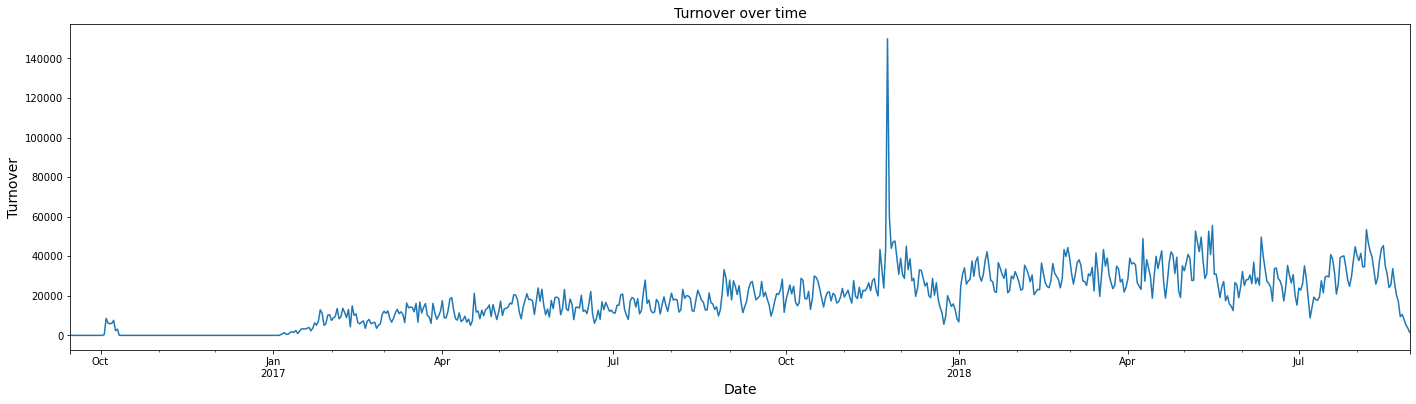

In [29]:
ax = product_turnover.turnover.plot(figsize=(24, 6))
ax.set_title('Turnover over time', fontsize=14)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Turnover', fontsize=14)
plt.show()

Sudden spike in aggregated turnover on 2017-11-24. 

In [30]:
product_turnover['2017-11-22':'2017-11-26']

,items_sold,turnover
2017-11-22,231,23951.51
2017-11-23,326,43102.33
2017-11-24,1345,149916.58
2017-11-25,569,59928.51
2017-11-26,450,44000.48


Concerning recent decline in aggregated turnover.

In [31]:
product_turnover.tail(10)

,items_sold,turnover
2018-08-20,282,33749.50
2018-08-21,257,26274.06
2018-08-22,215,20247.24
2018-08-23,161,17030.87
2018-08-24,115,9440.71
2018-08-25,75,10599.41
2018-08-26,82,8070.71
2018-08-27,71,5345.91
2018-08-28,45,3673.91
2018-08-29,16,1546.04


### Turnover in categories
We will calculate slope coeff for every category to get a better sense and understanding of turnover in categories and tendency associated with it. Note, that below calculations are conducted since 2018-01-01. 

In [32]:
from sklearn.linear_model import LinearRegression

In [33]:
slopes = {}
for key in categories.keys():
    categories[key] = categories[key]['2018-01-01':]
    categories[key]['Time'] = np.arange(len(categories[key].index))
    X = categories[key].loc[:, ['Time']]  
    y = categories[key].loc[:, 'turnover']
    model = LinearRegression()
    model.fit(X, y)
    slopes[key] = model.coef_[0]

##### Categories grownig since 2018

In [34]:
for key in slopes.keys():
    if slopes[key] > 0:
        print('slope_coeff: {}, sample points: {}, category: {}'.format(round(slopes[key], 2), categories[key].items_sold.sum(), key))

slope_coeff: 0.76, sample points: 1606, category: perfumaria
slope_coeff: 0.02, sample points: 165, category: artes
slope_coeff: 4.81, sample points: 3969, category: utilidades_domesticas
slope_coeff: 0.08, sample points: 519, category: eletrodomesticos
slope_coeff: 5.97, sample points: 5841, category: beleza_saude
slope_coeff: 0.75, sample points: 2580, category: automotivo
slope_coeff: 2.71, sample points: 2293, category: telefonia
slope_coeff: 1.33, sample points: 72, category: pcs
slope_coeff: 0.29, sample points: 454, category: casa_construcao
slope_coeff: 1.48, sample points: 3628, category: relogios_presentes
slope_coeff: 2.27, sample points: 787, category: construcao_ferramentas_construcao
slope_coeff: 1.97, sample points: 1146, category: pet_shop
slope_coeff: 0.41, sample points: 239, category: moveis_sala
slope_coeff: 0.39, sample points: 153, category: sinalizacao_e_seguranca
slope_coeff: 0.12, sample points: 308, category: livros_interesse_geral
slope_coeff: 0.33, sample po

##### Categories in decline since 2018

In [35]:
for key in slopes.keys():
    if slopes[key] < 0:
        print('slope_coeff: {}, sample points: {}, category: {}'.format(round(slopes[key], 2), categories[key].items_sold.sum(),key))

slope_coeff: -6.21, sample points: 4436, category: esporte_lazer
slope_coeff: -1.62, sample points: 1731, category: bebes
slope_coeff: -0.41, sample points: 393, category: instrumentos_musicais
slope_coeff: -3.51, sample points: 1447, category: cool_stuff
slope_coeff: -1.27, sample points: 4051, category: moveis_decoracao
slope_coeff: -0.3, sample points: 1454, category: brinquedos
slope_coeff: -1.69, sample points: 5810, category: cama_mesa_banho
slope_coeff: -0.18, sample points: 143, category: construcao_ferramentas_seguranca
slope_coeff: -9.43, sample points: 4622, category: informatica_acessorios
slope_coeff: -1.2, sample points: 487, category: malas_acessorios
slope_coeff: -1.25, sample points: 1849, category: ferramentas_jardim
slope_coeff: -2.17, sample points: 870, category: moveis_escritorio
slope_coeff: -0.93, sample points: 1837, category: eletronicos
slope_coeff: -0.02, sample points: 70, category: fashion_calcados
slope_coeff: -1.87, sample points: 1501, category: papelar

## 3.3) Products analytics

### Best selling product(s) by category

In [36]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

for category in products.product_category_name.unique():
    if products[products.product_category_name==category].shape[0]==1:
        continue
    category_data = products[products.product_category_name==category]
    category_data.sort_values(by='items_sold', ascending=False, inplace=True)
    category_data[category_data.items_sold==category_data.head(1).items_sold[0]]
    print('Category: {}'.format(category))
    for index, row in category_data[category_data.items_sold==category_data.head(1).items_sold[0]].iterrows():
        print('product_id: {}, items_sold: {}'.format(index, row.items_sold))
    print('\n')
print('Single product in a category:')
for category in products.product_category_name.unique():
    if products[products.product_category_name==category].shape[0]==1:
        print('product_id: {}, items_sold: {}, category: {}'.format(products[products.product_category_name==category].index[0], 
                                                                    products[products.product_category_name==category].items_sold[0],
                                                                    category))

Category: perfumaria
product_id: 2028bf1b01cafb2d2b1901fca4083222, items_sold: 132


Category: artes
product_id: 4fe644d766c7566dbc46fb851363cb3b, items_sold: 105


Category: esporte_lazer
product_id: c6336fa91fbd87c359e44f5dca5a90ed, items_sold: 92


Category: bebes
product_id: cac9e5692471a0700418aa3400b9b2b1, items_sold: 88


Category: utilidades_domesticas
product_id: 42a2c92a0979a949ca4ea89ec5c7b934, items_sold: 177


Category: instrumentos_musicais
product_id: 738da8ddda2e593acfdc53c2d1520dfa, items_sold: 23


Category: cool_stuff
product_id: c6dd917a0be2a704582055949915ab32, items_sold: 120


Category: moveis_decoracao
product_id: aca2eb7d00ea1a7b8ebd4e68314663af, items_sold: 520


Category: eletrodomesticos
product_id: be837f2e0152a208d4386f4126d5bd7c, items_sold: 36


Category: brinquedos
product_id: 880be32f4db1d9f6e2bec38fb6ac23ab, items_sold: 99


Category: cama_mesa_banho
product_id: 99a4788cb24856965c36a24e339b6058, items_sold: 477


Category: construcao_ferramentas_segur

### Worst selling product(s) by category

In [37]:
import warnings
from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

for category in products.product_category_name.unique():
    if products[products.product_category_name==category].shape[0]==1:
        continue
    category_data = products[products.product_category_name==category]
    category_data.sort_values(by='items_sold', ascending=True, inplace=True)
    category_data[category_data.items_sold==category_data.head(1).items_sold[0]]
    print('Category: {}'.format(category))
    for index, row in category_data[category_data.items_sold==category_data.head(1).items_sold[0]].iterrows():
        print('product_id: {}, items_sold: {}'.format(index, row.items_sold))
    print('\n')
print('\nSingle product in a category:\n')
for category in products.product_category_name.unique():
    if products[products.product_category_name==category].shape[0]==1:
        print('product_id: {}, items_sold: {}, category: {}'.format(products[products.product_category_name==category].index[0], 
                                                                    products[products.product_category_name==category].items_sold[0],
                                                                    category))

Category: perfumaria
product_id: 99867d4e33798b303108f7eeb2f91b41, items_sold: 0
product_id: ad2ff9b0c224aa7d855f7fd8109b6289, items_sold: 0
product_id: 2dfda1ff7f02fb76576e5961ddd85e38, items_sold: 0
product_id: 8cc012c0a83e6021df4f2b2d01d8debc, items_sold: 0
product_id: 5e17b27aa688dc45b02f5bf9276a4bab, items_sold: 0
product_id: 0ac9ae2550c94021daa1059ad06d2c4a, items_sold: 0
product_id: 86cbe3f62944a6ad224137e01f54c0b9, items_sold: 0
product_id: 48e1175aec66cc4cd9998ea2e6eeae04, items_sold: 0
product_id: 2aa489c905e1d41d8c716a6d6912d8c2, items_sold: 0
product_id: d6d5ec5325b35cac036b7d2ad2d8bc3b, items_sold: 0
product_id: db729c4310411c0be04a91785f063ea8, items_sold: 0


Category: artes
product_id: 986700c98805af229ab7ad51b95fa356, items_sold: 0
product_id: 42f33073be6531e8f6d0a18fda862ea1, items_sold: 0
product_id: 5304ff3fa35856a156e1170a6022d34d, items_sold: 0


Category: esporte_lazer
product_id: ec20bfc2bad5031fd6cfd400304841c4, items_sold: 0
product_id: 966b5d9192f75a085e72b48

Category: relogios_presentes
product_id: 1f33f54aa8e680e3d3b654539abfdcca, items_sold: 0
product_id: 270205bec6114bb05c09ed724555eac0, items_sold: 0
product_id: de1573cfa183a3b9ef746bc24261a497, items_sold: 0
product_id: 148d27957e1653a2e9c8c3771f5a5a0f, items_sold: 0
product_id: 77b5008f271c9f74447191efb065bc28, items_sold: 0
product_id: 9207d6b9c76ea46cbc5b101a23293cc2, items_sold: 0
product_id: f3466e14c29ba0ba18ff6362c94ecdfa, items_sold: 0
product_id: 78fad3f4efdb56669eb01fbabfe93b44, items_sold: 0
product_id: 8d77b937d01f4d6ca31ea084ec26fced, items_sold: 0
product_id: 3a48c5b0b294fbbc416b0939e69f6f09, items_sold: 0
product_id: ce99c3515272dee739f2d3eddae0f2cf, items_sold: 0
product_id: d69f444e73428ff2177e524685c16d26, items_sold: 0
product_id: e6cca1e56d395424edec4a6346b5d4d0, items_sold: 0
product_id: 802bc2a46b2276fc7488df8aac5c8971, items_sold: 0
product_id: 97868e08c02c9f4f6b49ebe5a4d4dfec, items_sold: 0
product_id: 04d5a0ec1f6db00db01676199151df4c, items_sold: 0
product_id:

Category: artigos_de_natal
product_id: 1b46816aa838ce9ae97feda7b2f51f26, items_sold: 0
product_id: 2d771944d4a7dc7d95d974cfe4be96ff, items_sold: 0


Category: fashion_roupa_infanto_juvenil
product_id: 2b18330ce86ae5c606250b75b499f370, items_sold: 0


Category: dvds_blu_ray
product_id: 0350ac874c8937571b129554110ec3b6, items_sold: 0
product_id: e485be8a88ca64e497e88b16af6cc11d, items_sold: 0


Category: artes_e_artesanato
product_id: 43506d2b6b5e0535079f88c7dc51c4de, items_sold: 1
product_id: 78eacca1151432fda7271e7e53e49720, items_sold: 1
product_id: c51fd9478d188180d962c7ecc35b42d0, items_sold: 1
product_id: eacb104882d39ffb53140b1d1860a7c3, items_sold: 1
product_id: 3a96bcbf644a5d390107570628568026, items_sold: 1
product_id: 56a1efb30499b4dffd45c8d655199b11, items_sold: 1
product_id: ec90895370885d025efeb8e72e7fa699, items_sold: 1
product_id: 5aa0d6ed4e6c0995d62090cd82cde89a, items_sold: 1
product_id: c36f564e4c2baa5ed9d7bfa1a111c29c, items_sold: 1
product_id: 6bb18295cc019bf3b6dc7c7

### Dependence of product weight on turnover and price

In [38]:
import seaborn as sns

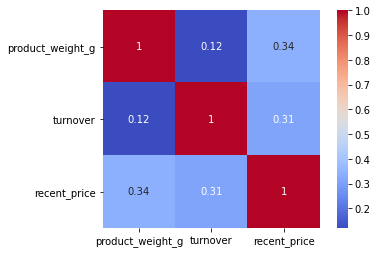

In [39]:
sns.heatmap(products[['product_weight_g','turnover','recent_price']].corr(), annot=True, square=True, cmap='coolwarm')
plt.show()

## 3.4) Sellers analytics

### Best seller by state

In [40]:
for state in sellers.seller_state.unique():
    if sellers[sellers.seller_state==state].shape[0] == 1:
        continue
    state_data = sellers[sellers.seller_state==state]
    state_data.sort_values(by='turnover', ascending=False, inplace=True)
    print('State: {}, seller_id: {}, turnower: {}'.format(state, state_data.head(1).index[0], round(state_data.head(1).turnover.values[0], 2)))
print('\nOnly single seller:\n')
for state in sellers.seller_state.unique():
    if sellers[sellers.seller_state==state].shape[0] == 1:
        print('State: {}, seller_id: {}, turnower: {}'.format(state, sellers[sellers.seller_state==state].index[0], round(sellers[sellers.seller_state==state].turnover.values[0], 2)))

State: SP, seller_id: 4869f7a5dfa277a7dca6462dcf3b52b2, turnower: 226987.93
State: RJ, seller_id: 46dc3b2cc0980fb8ec44634e21d2718e, turnower: 122811.38
State: PE, seller_id: de722cd6dad950a92b7d4f82673f8833, turnower: 55126.3
State: PR, seller_id: ccc4bbb5f32a6ab2b7066a4130f114e3, turnower: 72926.72
State: GO, seller_id: 9d5a9018aee56acb367ba9c3f05d1d6a, turnower: 10119.98
State: SC, seller_id: 04308b1ee57b6625f47df1d56f00eedf, turnower: 58991.8
State: BA, seller_id: 53243585a1d6dc2643021fd1853d8905, turnower: 217940.44
State: DF, seller_id: 44073f8b7e41514de3b7815dd0237f4f, turnower: 18380.64
State: RS, seller_id: 87142160b41353c4e5fca2360caf6f92, turnower: 31095.98
State: MG, seller_id: a1043bafd471dff536d0c462352beb48, turnower: 99309.23
State: RN, seller_id: 02d35243ea2e497335cd0f076b45675d, turnower: 5794.0
State: MT, seller_id: 2dee2ce60de9709b1a24083217181a1f, turnower: 7784.5
State: CE, seller_id: bbf9ad41dca6603e614efcdad7aab8c4, turnower: 7846.0
State: PB, seller_id: a6bd7d1c

### Worst seller(s) by state

In [41]:
for state in sellers.seller_state.unique():
    if sellers[sellers.seller_state==state].shape[0] == 1:
        continue
    state_data = sellers[sellers.seller_state==state]
    state_data.sort_values(by='turnover', ascending=True, inplace=True)
    state_data[state_data.turnover==state_data.head(1).items_sold[0]]
    print('State: {}'.format(state))
    for index, row in state_data[state_data.turnover==state_data.head(1).turnover[0]].iterrows():
        print('seller_id: {}, turnover: {}'.format(index, round(row.turnover, 2)))
    print('\n')
print('\nOnly single seller:\n')
for state in sellers.seller_state.unique():
    if sellers[sellers.seller_state==state].shape[0] == 1:
        print('State: {}, seller_id: {}, turnower: {}'.format(state, sellers[sellers.seller_state==state].index[0], round(sellers[sellers.seller_state==state].turnover.values[0], 2)))

State: SP
seller_id: b6c6854d4d92a5f6f46be8869da3fa1a, turnover: 0.0
seller_id: 58b98ccb79873e04eac4357cacc590d9, turnover: 0.0
seller_id: 92992bec39dde5766f590d3b1f46d465, turnover: 0.0
seller_id: fc99f99385ae90f66f01733856fb88c9, turnover: 0.0
seller_id: 6e85dc5ecd97a61094b89b046a509d8e, turnover: 0.0
seller_id: 15ac3c501e2599e4917316fde5c5669a, turnover: 0.0
seller_id: d65f31d2413268e671989503f6cf9993, turnover: 0.0
seller_id: 90d4125885ab6c86e8820a722be71974, turnover: 0.0
seller_id: dadc51ef321949ec9a3ab25cd902e23d, turnover: 0.0
seller_id: c4b911d06343b21dd906651f8101cb49, turnover: 0.0
seller_id: a247197e2e9c19a6a53a6888cb8b660f, turnover: 0.0
seller_id: c85d7b477a709c85a1e8b8f25aa1b270, turnover: 0.0
seller_id: a1ed30492b3b798bc121845bc4aa7366, turnover: 0.0
seller_id: 37ceb404da208418c9032f0674e57804, turnover: 0.0
seller_id: 3820c6537b3853be1a0687d5a60807ec, turnover: 0.0
seller_id: 4bc3d93e4a5f88a598d3d8ce4ae510b3, turnover: 0.0
seller_id: deaadd805612bf94faaa9fa702516e11, t

### Best sellers (aggregate)

In [42]:
sellers.sort_values(by='turnover', ascending=False).head(15)

,seller_state,turnover,items_sold
seller_id,,,
4869f7a5dfa277a7dca6462dcf3b52b2,SP,226987.93,1148
53243585a1d6dc2643021fd1853d8905,BA,217940.44,400
4a3ca9315b744ce9f8e9374361493884,SP,196882.12,1949
fa1c13f2614d7b5c4749cbc52fecda94,SP,190917.14,579
7c67e1448b00f6e969d365cea6b010ab,SP,186570.05,1355
7e93a43ef30c4f03f38b393420bc753a,SP,165981.49,322
da8622b14eb17ae2831f4ac5b9dab84a,SP,159816.87,1548
7a67c85e85bb2ce8582c35f2203ad736,SP,139658.69,1155
1025f0e2d44d7041d6cf58b6550e0bfa,SP,138208.56,1420


It is not a surprise that most prolific sellers are located in 'SP'. Intresting thing to note: our second most prolific seller is located in 'BA', rather fringe state considering turnover share. Let's investigate a little further, but it seems like this seller must be a leader in his area.

In [43]:
sellers[sellers.seller_state=='BA'].sort_values(by='turnover', ascending=False).head(5)

,seller_state,turnover,items_sold
seller_id,,,
53243585a1d6dc2643021fd1853d8905,BA,217940.44,400
c72de06d72748d1a0dfb2125be43ba63,BA,17522.00,22
75d34ebb1bd0bd7dde40dd507b8169c3,BA,12656.33,67
d03698c2efd04a549382afa6623e27fb,BA,8865.47,21
4aba391bc3b88717ce08eb11e44937b2,BA,7286.88,28


### Worst sellers (aggregate)

There are numerous sellers with no single item sold.

In [44]:
(sellers['items_sold'] == 0).sum(), (sellers['turnover'] == 0).sum()

(125, 125)

We will list in this case worst sellers that did actually note at least minimal activity.

In [48]:
sellers[sellers['items_sold'] != 0].sort_values(by='turnover', ascending=True).head(5)

,seller_state,turnover,items_sold
seller_id,,,
77128dec4bec4878c37ab7d6169d6f26,SP,6.50,1
1fa2d3def6adfa70e58c276bb64fe5bb,SP,6.90,1
702835e4b785b67a084280efca355756,MG,7.60,1
ad14615bdd492b01b0d97922e87cb87f,SC,8.25,1
4965a7002cca77301c82d3f91b82e1a9,SP,8.49,1
